# Supervised learning - Classification

- Imbalanced dataset
- Ensamble classifiers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.utils import resample

# Imbalanced dataset

In [2]:
df = pd.read_csv('nonsep.csv', sep=';', header=None)
df.columns = ['x', 'y', 'class']
df_imbalanced = df[df['class'] == -1].copy()
df_imbalanced = df_imbalanced.append(df[df['class'] == 1].sample(n=10, random_state=42))
print(df.shape)
print(df_imbalanced.shape)

(140, 3)
(80, 3)


/tmp/ipykernel_837/484790767.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_imbalanced = df_imbalanced.append(df[df['class'] == 1].sample(n=10, random_state=42))


Accuracy vs F1 score

Accuracy se hodi kdyz je dataset vyvazeny, pokud neni, tak je lepsi F1. Accuracy neumi pak moc poznat mene zastoupenou tridu.

Text(0.5, 1.0, 'Imbalanced dataset')

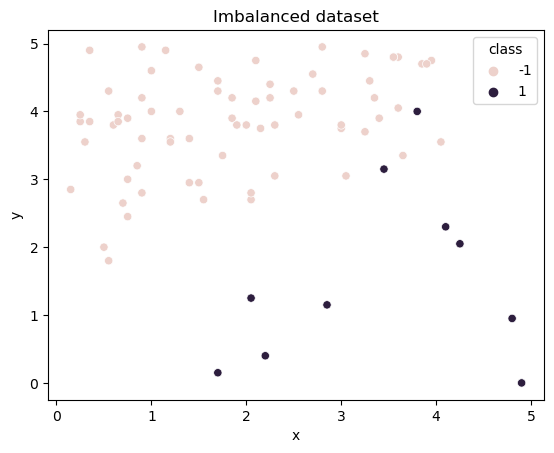

In [3]:
sns.scatterplot(data=df_imbalanced, x='x', y='y', hue='class')
plt.title('Imbalanced dataset')

## Train test split for evaluation
Be aware to do under/oversampling only for training split. Don't disturb class ratio in you test set of data. U want to have test set isolated from under/oversampling procedures, to mimic real data distribution for classificator evaluation. You add a lot of bias to the evaluation, when using under/oversampling methods for whole dataset.

In [4]:
df_train, df_test = train_test_split(df_imbalanced, test_size=0.5, stratify=df_imbalanced['class'], random_state=42)
X_train, X_test, y_train, y_test = df_train[df_train.columns[df_train.columns != 'class']].values, df_test[df_test.columns[df_test.columns != 'class']].values, df_train['class'].values, df_test['class'].values

Text(0.5, 1.0, 'Train set')

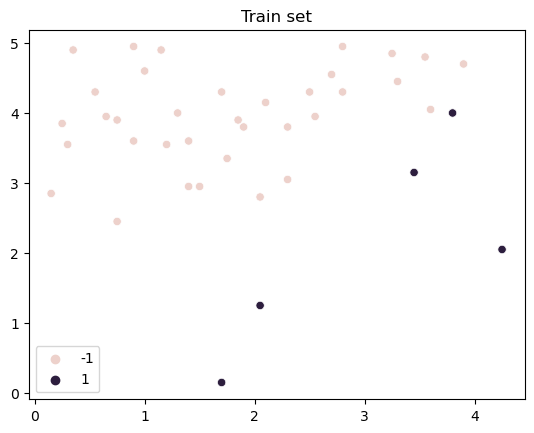

In [5]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set')

#### Class distribution in train set:

In [6]:
pd.Series(y_train).value_counts()

-1    35
 1     5
dtype: int64

In [7]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.888888888888889
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

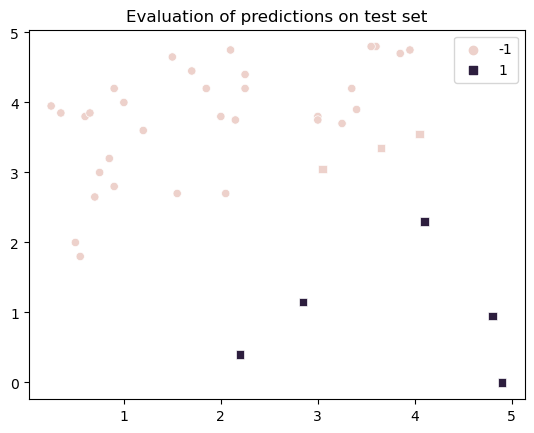

In [8]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## Undersampling

Odebirani z vice zastoupene tridy, tzn pokud je jedna trida 50 a druha trida 10, tak se prvni trida zmensi na 10 zaznamu

In [9]:
df_train_downsample = resample(df_train[df_train['class'] == -1],
             replace=True,
             n_samples=len(df_train[df_train['class'] == 1]),
             random_state=42)
df_train_downsample = df_train_downsample.append(df_train[df_train['class'] == 1])
df_train_downsample.shape

/tmp/ipykernel_837/3453917984.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_downsample = df_train_downsample.append(df_train[df_train['class'] == 1])


(10, 3)

In [10]:
X_train, y_train = df_train_downsample[df_train_downsample.columns[df_train_downsample.columns != 'class']].values, df_train_downsample['class'].values

Text(0.5, 1.0, 'Train set after downsampling')

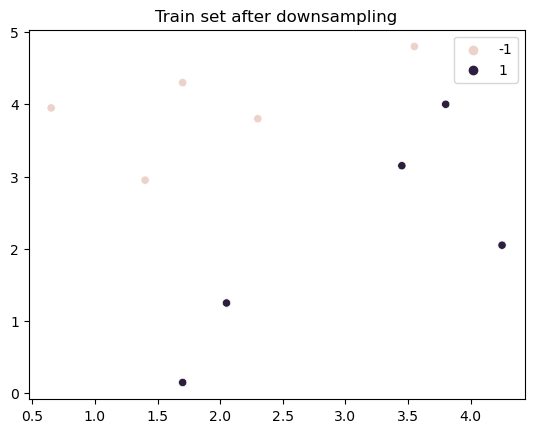

In [11]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after downsampling')

#### Class distribution in train set:

In [12]:
pd.Series(y_train).value_counts()

-1    5
 1    5
dtype: int64

In [13]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 1.0
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

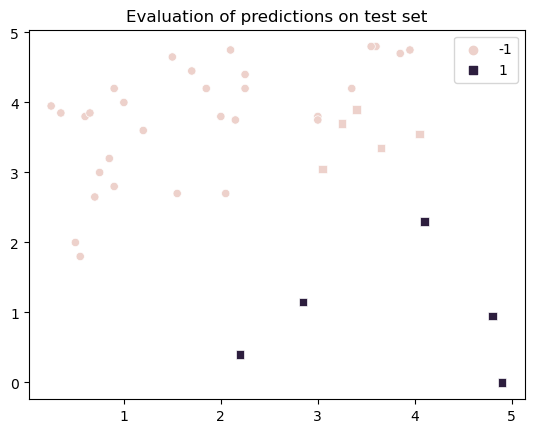

In [14]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## Oversampling

Opak undersamplingu, mene zastoupenou tridu budu opakovat abych dorovnal pocty zastoupeni trid

In [15]:
df_train_upsample = resample(df_train[df_train['class'] == 1],
             replace=True,
             n_samples=len(df_train[df_train['class'] == -1]),
             random_state=42)
df_train_upsample = df_train_upsample.append(df_train[df_train['class'] == -1])
df_train_upsample.shape

/tmp/ipykernel_837/1284013685.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_upsample = df_train_upsample.append(df_train[df_train['class'] == -1])


(70, 3)

In [16]:
X_train, y_train = df_train_upsample[df_train_upsample.columns[df_train_upsample.columns != 'class']].values, df_train_upsample['class'].values

Text(0.5, 1.0, 'Train set after upsampling')

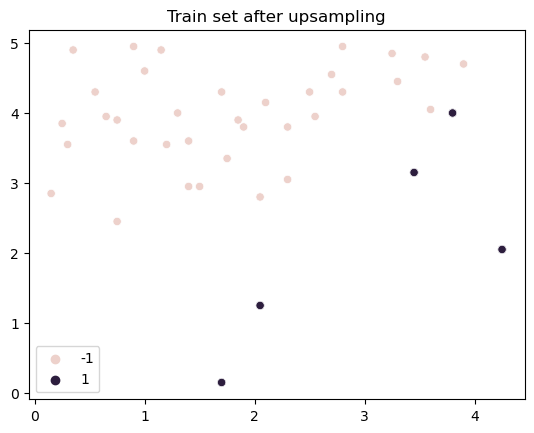

In [17]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after upsampling')

#### Class distribution in train set:

In [18]:
pd.Series(y_train).value_counts()

 1    35
-1    35
dtype: int64

In [19]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577464
test score is 0.6666666666666666


Text(0.5, 1.0, 'Evaluation of predictions on test set')

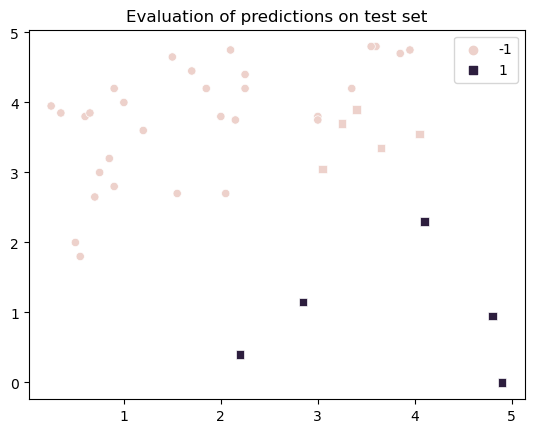

In [20]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

## SMOTE

Instalation of Python library with SMOTE:

- ``pip install imbalanced-learn``

https://towardsdatascience.com/smote-synthetic-data-augmentation-for-tabular-data-1ce28090debc

In [21]:
# %pip install imbalanced-learn

Snazi se vytvorit nove podobne data, nejvice zalozene na KNN, snaží se vytvořit co nejbližšího souseda.

Problém je v integritních omezeních, SMOTE je pravděpodobně nageneruje hodnoty mimo reálně možné hodnoty

In [22]:
from imblearn.over_sampling import SMOTE

# k_neightbors = dulezity parametr
su = SMOTE(random_state=42, k_neighbors=4)
X_train, y_train = df_train[df_train.columns[df_train.columns != 'class']].values, df_train['class'].values
X_train, y_train = su.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((70, 2), (70,))

Text(0.5, 1.0, 'Train set after SMOTE')

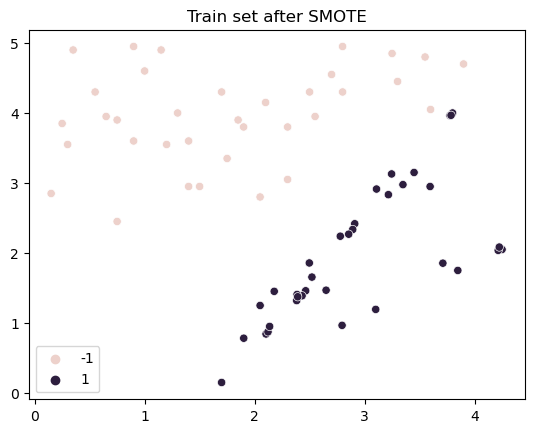

In [23]:
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train)
plt.title('Train set after SMOTE')

#### Class distribution in train set:

In [24]:
pd.Series(y_train).value_counts()

-1    35
 1    35
dtype: int64

In [25]:
clf = LinearSVC()
clf.fit(X_train, y_train)
print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
print(f'test score is {f1_score(y_test, clf.predict(X_test))}')

train score is 0.9859154929577464
test score is 0.7692307692307693


Text(0.5, 1.0, 'Evaluation of predictions on test set')

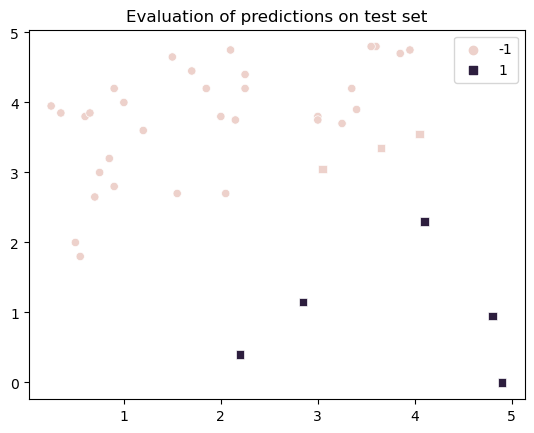

In [26]:
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_test, style=clf.predict(X_test), markers=['o','s'])
plt.title('Evaluation of predictions on test set')

### Imbalanced learn library
- U can find other methods for under/over sampling in library's documentation: https://imbalanced-learn.org/stable/references/index.html#api
- U can find similar methods as SMOTE for over sampling on following page: https://imbalanced-learn.org/stable/references/over_sampling.html

# Ensamble classifiers

Explain following terms:
- Bagging
- Boosting
- Stacking

Studing materials:
- Lectures - https://homel.vsb.cz/~pla06/
- https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/
- https://scikit-learn.org/stable/modules/ensemble.html#ensemble
- https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble

### How they differ?

Vycházejí z klasických klasifikátorů, je to složený model z několika jednodušších, např. random forest - několik decision trees.


 - **Bagging** - Random forest je založený na baggingu, je to jednoduše 10 klasifikátorů v jednom modelu a zkombinovat do jedné predikce, tady se řeší přes (vážený) voting, co tam bylo nejčastěji, vyhrává. Klasifikátory se mění tak, že se jinak samplují jednotlivé klasifikátory a natrénují.
 - **Boosting** - Pracuje se s vahami, aplikují se na data i na dílčí modely, všem instancím dáme stejnou váhu a pustíme dílčí model. Špatně klasifikované dostanou vyšší váhu a pak se spouští další klasifikátor, který tyto váhy zohledňuje. Takto se to opakuje po N iteracích, dokud není natrénováno. Většinou decision trees s omezenou hloubku. Přesnější modely mají vyšší příspěvek do finálního výstupu. Opět nějaký vážený voting.
 - **Stacking** - Vezmu klasifikátor, natrénuju a udělám predikci. Výstupty jednotlivých klasifikátorů se slejou dohromady a pak se natrénuje finální klasifikátor. Výhoda - když je více různých modelů, je lepší mít diverzitu v modelech, každý model najde různé vzory.


# Individual tasks (3p)

## Task 1(2p):
Use RandomForestClassifier for prediction of survival class on Titanic dataset.

Tune parameters for this classifier, try at least 5 parameter's configurations and produce table or plot.

**Parameter** - n_estimators => 10 => 100

In [27]:
df = pd.read_csv('titanic_preprocessed.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.0,22.000000,1,0,7.2500,7.0,0,0,1
1,2,1,1,1.0,38.000000,1,0,71.2833,2.0,1,0,0
2,3,1,3,1.0,26.000000,0,0,7.9250,7.0,0,0,1
3,4,1,1,1.0,35.000000,1,0,53.1000,2.0,0,0,1
4,5,0,3,0.0,35.000000,0,0,8.0500,7.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,0.0,27.000000,0,0,13.0000,7.0,0,0,1
885,888,1,1,1.0,19.000000,0,0,30.0000,1.0,0,0,1
886,889,0,3,1.0,29.699118,1,2,23.4500,7.0,0,0,1
887,890,1,1,0.0,26.000000,0,0,30.0000,2.0,1,0,0


In [28]:
df.drop('PassengerId', axis=1, inplace=True)

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.0,22.000000,1,0,7.2500,7.0,0,0,1
1,1,1,1.0,38.000000,1,0,71.2833,2.0,1,0,0
2,1,3,1.0,26.000000,0,0,7.9250,7.0,0,0,1
3,1,1,1.0,35.000000,1,0,53.1000,2.0,0,0,1
4,0,3,0.0,35.000000,0,0,8.0500,7.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,0.0,27.000000,0,0,13.0000,7.0,0,0,1
885,1,1,1.0,19.000000,0,0,30.0000,1.0,0,0,1
886,0,3,1.0,29.699118,1,2,23.4500,7.0,0,0,1
887,1,1,0.0,26.000000,0,0,30.0000,2.0,1,0,0


In [49]:
df_train, df_test = train_test_split(df, test_size=0.4, stratify=df['Survived'], random_state=42)

In [50]:
df_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
369,1,1,0.0,25.000000,1,0,55.4417,4.0,1,0,0
802,1,3,0.0,0.420000,0,1,8.5167,7.0,1,0,0
195,0,3,0.0,29.699118,0,0,7.7500,7.0,0,1,0
809,0,3,0.0,26.000000,0,0,7.8875,7.0,0,0,1
690,1,3,1.0,4.000000,0,1,13.4167,7.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
173,0,1,0.0,56.000000,0,0,30.6958,0.0,1,0,0
296,0,1,1.0,2.000000,1,2,151.5500,2.0,0,0,1
243,0,3,0.0,30.000000,0,0,7.2250,7.0,1,0,0
38,0,3,1.0,18.000000,2,0,18.0000,7.0,0,0,1


In [51]:
X_train, X_test, y_train, y_test = df_train[df_train.columns[df_train.columns != 'Survived']].values, df_test[df_test.columns[df_test.columns != 'Survived']].values, df_train['Survived'].values, df_test['Survived'].values

In [52]:
pd.Series(y_train).value_counts()

0    329
1    204
dtype: int64

In [53]:
X_train, y_train

(array([[ 3.        ,  0.        , 17.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        ,  1.        , 43.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 3.        ,  1.        , 48.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        ,  0.        , 47.        , ...,  0.        ,
          0.        ,  1.        ],
        [ 3.        ,  1.        , 29.69911765, ...,  0.        ,
          1.        ,  0.        ]]),
 array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
   

In [54]:
params = []

for i in range(10, 100, 10):
    params.append({'n_estimators': i, 'criterion': 'gini'})
    
for i in range(10, 100, 10):
    params.append({'n_estimators': i, 'criterion': 'entropy'})


## Classification WITHOUT Under/Over sampling

In [61]:
test_scores = []

scores = {'estimators': [], 'criterion': [], 'score': []}
for p in params:
    clf = RandomForestClassifier(**p)
    clf.fit(X_train, y_train)
    # print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
    # print(f'test score is {f1_score(y_test, clf.predict(X_test))}')
    s = f1_score(y_test, clf.predict(X_test))
    test_scores.append((s, p))
    scores['estimators'].append(p['n_estimators'])
    scores['criterion'].append(p['criterion'])
    scores['score'].append(s)
    
test_scores = sorted(test_scores, key=lambda t: t[0], reverse=True)
display(test_scores[:6])

display(test_scores[0])

[(0.7453874538745388, {'n_estimators': 80, 'criterion': 'gini'}),
 (0.7306273062730627, {'n_estimators': 90, 'criterion': 'entropy'}),
 (0.7300380228136881, {'n_estimators': 10, 'criterion': 'entropy'}),
 (0.7293233082706766, {'n_estimators': 20, 'criterion': 'gini'}),
 (0.7293233082706766, {'n_estimators': 40, 'criterion': 'gini'}),
 (0.728624535315985, {'n_estimators': 50, 'criterion': 'entropy'})]

(0.7453874538745388, {'n_estimators': 80, 'criterion': 'gini'})

In [62]:
scores_df = pd.DataFrame.from_dict(scores)
score_df.sort_values(by='score', ascending=False)

,kneigh,estimators,criterion,score
15,4,70,entropy,0.747253
4,4,50,gini,0.736059
41,8,60,gini,0.735294
53,8,90,entropy,0.733333
8,4,90,gini,0.732601
19,6,20,gini,0.730769
31,6,50,entropy,0.730627
45,8,10,entropy,0.729323
43,8,80,gini,0.728625
42,8,70,gini,0.727941


## Classification WITH Under/Over sampling

In [56]:
class_col = 'Survived'

In [57]:
su = SMOTE(random_state=42, k_neighbors=6)
X_train, y_train = df_train[df_train.columns[df_train.columns != class_col]].values, df_train[class_col].values
X_train, y_train = su.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((658, 10), (658,))

In [58]:
pd.Series(y_train).value_counts()

0    329
1    329
dtype: int64

In [59]:
kneighbours = [4, 6, 8]
total_scores = {}

score_dict = {'kneigh': [], 'estimators': [], 'criterion': [], 'score': []}

for k in kneighbours:
    su = SMOTE(random_state=42, k_neighbors=k)
    X_train, y_train = df_train[df_train.columns[df_train.columns != class_col]].values, df_train[class_col].values
    X_train, y_train = su.fit_resample(X_train, y_train)
    for p in params:
        clf = RandomForestClassifier(**p)
        clf.fit(X_train, y_train)
        # print(f'train score is {f1_score(y_train, clf.predict(X_train))}')
        # print(f'test score is {f1_score(y_test, clf.predict(X_test))}')
        s = f1_score(y_test, clf.predict(X_test))
        score_dict['kneigh'].append(k)
        score_dict['estimators'].append(p['n_estimators'])
        score_dict['criterion'].append(p['criterion'])
        score_dict['score'].append(s)

In [60]:
score_df = pd.DataFrame.from_dict(score_dict)
score_df.sort_values(by='score', ascending=False)


,kneigh,estimators,criterion,score
15,4,70,entropy,0.747253
4,4,50,gini,0.736059
41,8,60,gini,0.735294
53,8,90,entropy,0.733333
8,4,90,gini,0.732601
19,6,20,gini,0.730769
31,6,50,entropy,0.730627
45,8,10,entropy,0.729323
43,8,80,gini,0.728625
42,8,70,gini,0.727941


## Task 2(1p):
Do experiments with under or over sampling and decribe experiments results on titanic dataset. (Naive or SMOTE under/over sampling). First do classification without, then with sampling.

## For fun:
Try other ensemble methods.

Experiment with various methods for under or over sampling.